In [36]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
!pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow_decision_forests as tfdf
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/zulfahmidev/capstone_ml/master/major_classification/dataset/dataset.csv")

In [40]:
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Major
0,4,5,4,5,5,4,3,3,4,5,...,4,5,4,2,4,5,3,4,2,ComputerScience
1,4,3,3,3,4,3,2,2,3,4,...,3,4,3,1,3,4,2,3,1,ComputerScience
2,5,5,5,5,4,5,4,3,5,5,...,5,5,4,2,5,5,4,5,2,ComputerScience
3,3,4,3,4,3,4,2,2,3,4,...,3,4,3,1,3,4,2,3,1,ComputerScience
4,4,5,4,5,5,4,3,3,4,5,...,4,5,4,2,4,5,3,4,2,ComputerScience
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352,3,2,4,5,1,3,2,4,5,1,...,2,4,5,1,3,2,4,5,1,Law
6353,4,5,1,3,2,4,5,1,3,2,...,5,1,3,2,4,5,1,3,2,Law
6354,5,1,3,2,4,5,1,3,2,4,...,1,3,2,4,5,1,3,2,4,Law
6355,1,3,2,4,5,1,3,2,4,5,...,3,2,4,5,1,3,2,4,5,Law


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6357 entries, 0 to 6356
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P1      6357 non-null   int64 
 1   P2      6357 non-null   int64 
 2   P3      6357 non-null   int64 
 3   P4      6357 non-null   int64 
 4   P5      6357 non-null   int64 
 5   P6      6357 non-null   int64 
 6   P7      6357 non-null   int64 
 7   P8      6357 non-null   int64 
 8   P9      6357 non-null   int64 
 9   P10     6357 non-null   int64 
 10  P11     6357 non-null   int64 
 11  P12     6357 non-null   int64 
 12  P13     6357 non-null   int64 
 13  P14     6357 non-null   int64 
 14  P15     6357 non-null   int64 
 15  P16     6357 non-null   int64 
 16  P17     6357 non-null   int64 
 17  P18     6357 non-null   int64 
 18  P19     6357 non-null   int64 
 19  P20     6357 non-null   int64 
 20  Major   6357 non-null   object
dtypes: int64(20), object(1)
memory usage: 1.0+ MB


In [42]:
df.isnull().sum()

P1       0
P2       0
P3       0
P4       0
P5       0
P6       0
P7       0
P8       0
P9       0
P10      0
P11      0
P12      0
P13      0
P14      0
P15      0
P16      0
P17      0
P18      0
P19      0
P20      0
Major    0
dtype: int64

In [43]:
df['Major'].unique()

array(['ComputerScience', 'Engineering', 'Sociology', 'Public Relations',
       'Psychology', 'Political Science', 'Physics', 'Pharmacy',
       'Mathematics', 'Criminology', 'Journalism', 'History', 'Geography',
       'English Literature', 'Ecology', 'Economics', 'Design',
       'Chemistry', 'Biology', 'Architecture', 'Anthropology', 'Nursing',
       'Medical', 'Law'], dtype=object)

In [44]:
X = df.iloc[:,0:20]
y = df['Major']

In [45]:
X

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
0,4,5,4,5,5,4,3,3,4,5,3,4,5,4,2,4,5,3,4,2
1,4,3,3,3,4,3,2,2,3,4,2,3,4,3,1,3,4,2,3,1
2,5,5,5,5,4,5,4,3,5,5,4,5,5,4,2,5,5,4,5,2
3,3,4,3,4,3,4,2,2,3,4,2,3,4,3,1,3,4,2,3,1
4,4,5,4,5,5,4,3,3,4,5,3,4,5,4,2,4,5,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352,3,2,4,5,1,3,2,4,5,1,3,2,4,5,1,3,2,4,5,1
6353,4,5,1,3,2,4,5,1,3,2,4,5,1,3,2,4,5,1,3,2
6354,5,1,3,2,4,5,1,3,2,4,5,1,3,2,4,5,1,3,2,4
6355,1,3,2,4,5,1,3,2,4,5,1,3,2,4,5,1,3,2,4,5


In [46]:
y

0       ComputerScience
1       ComputerScience
2       ComputerScience
3       ComputerScience
4       ComputerScience
             ...       
6352                Law
6353                Law
6354                Law
6355                Law
6356                Law
Name: Major, Length: 6357, dtype: object

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

# Decission Tree

In [48]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [49]:
print("akurasi:" ,metrics.accuracy_score(y_test, y_pred))

akurasi: 0.8632075471698113


In [50]:
y_pred = clf.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [51]:
y_pred

array(['Pharmacy'], dtype=object)

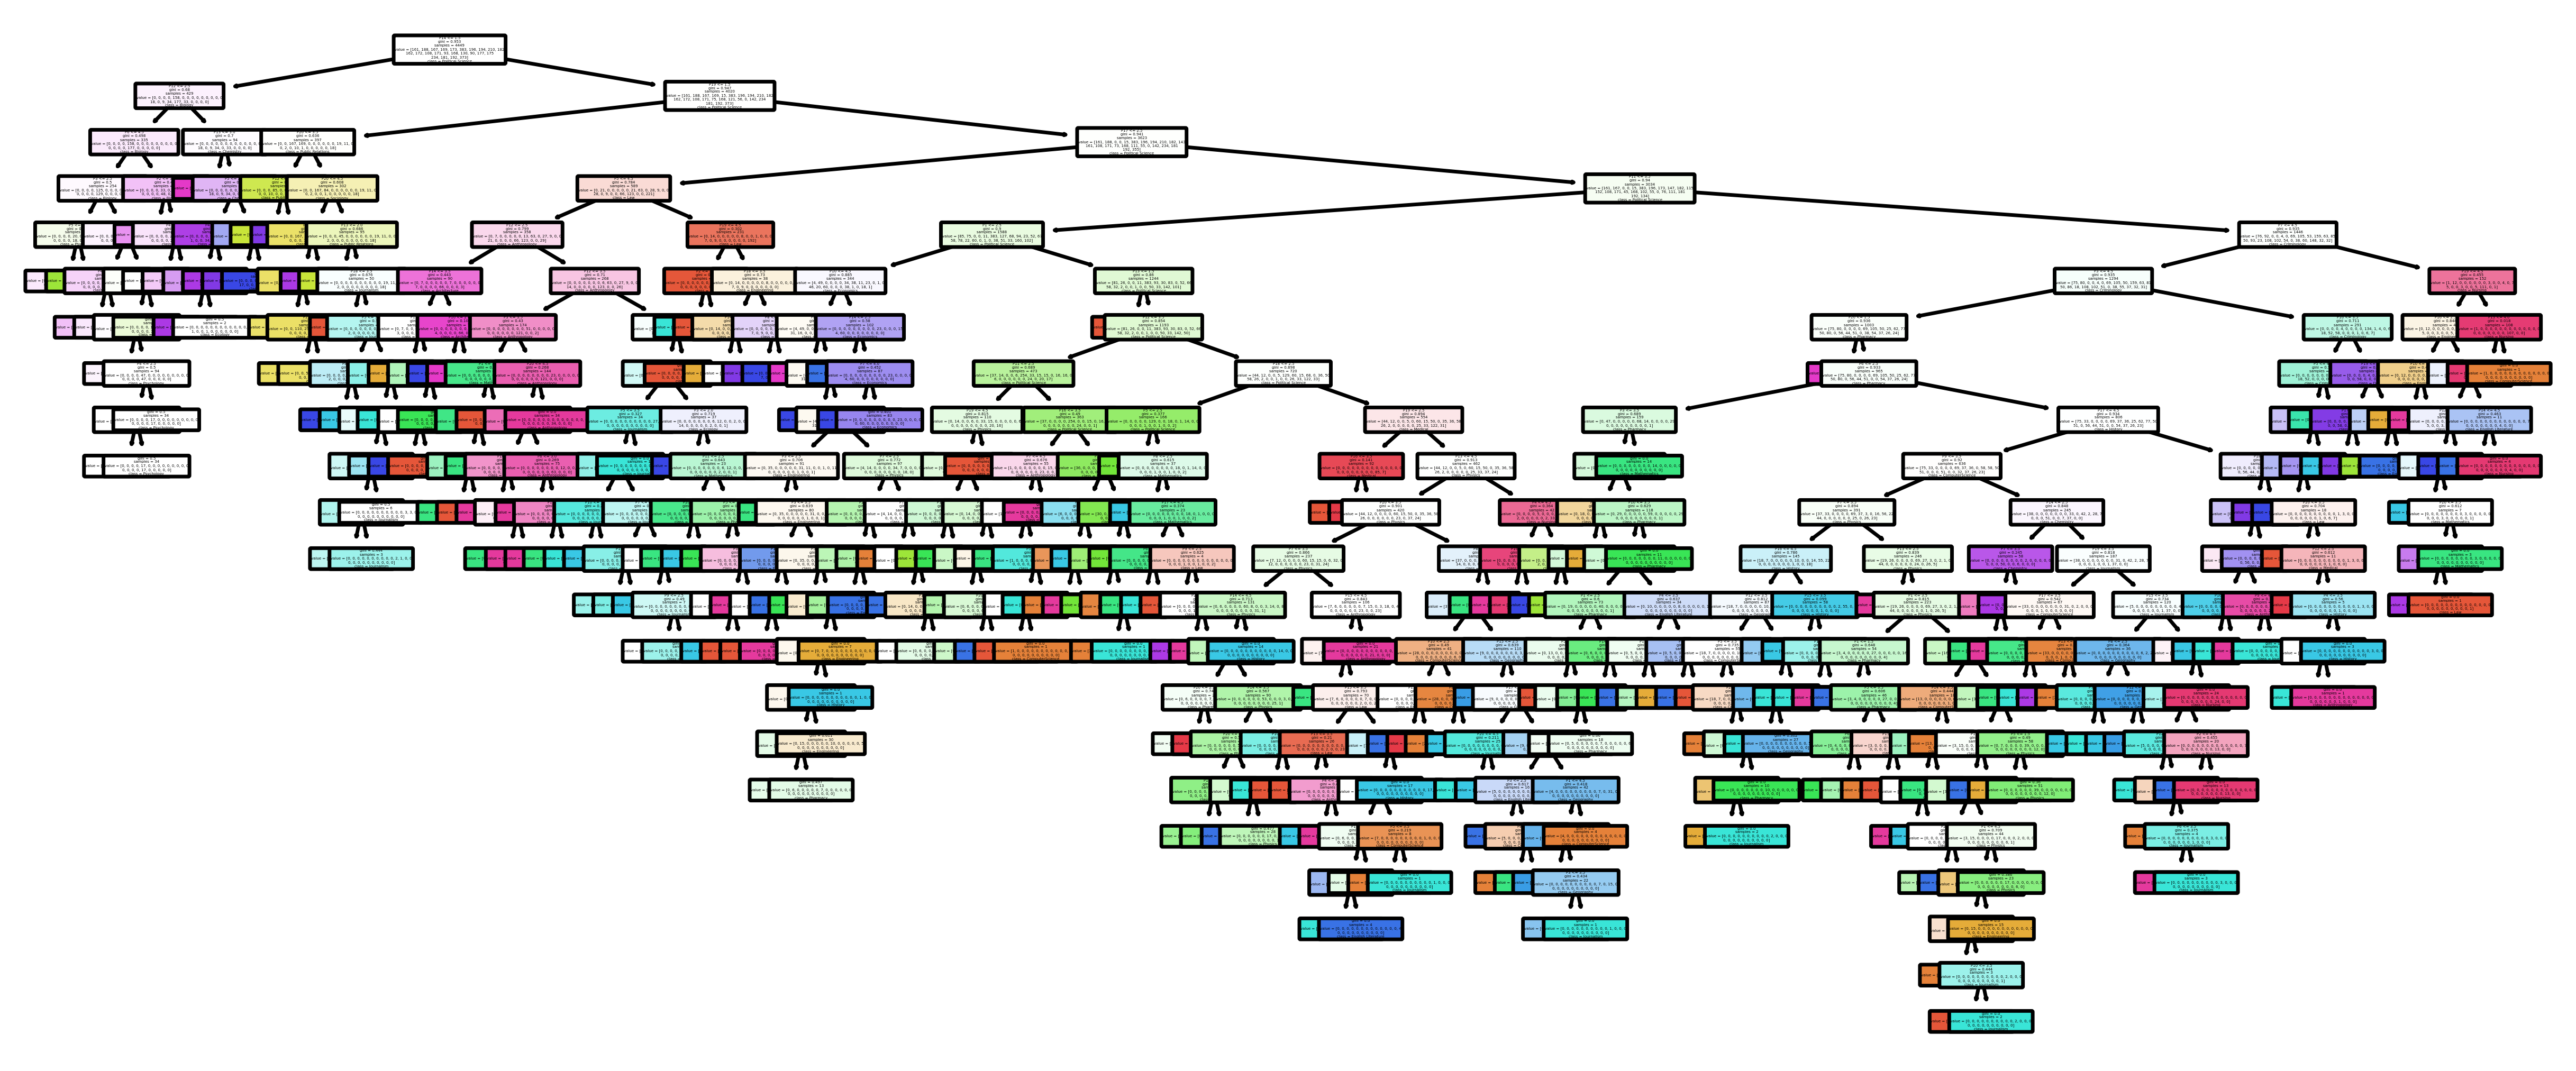

In [52]:
from sklearn import tree
import matplotlib.pyplot as plt


features_cols = ['P1', 'P2', 'P3', 'P4', 'P5','P6', 'P7', 'P8', 'P9', 'P10','P11', 'P12', 'P13', 'P14', 'P15','P16', 'P17', 'P18', 'P19', 'P20']
plt.figure(figsize=(12,5), dpi=500)
tree.plot_tree(clf,
               feature_names=features_cols,
               class_names=['ComputerScience', 'Engineering', 'Sociology', 'Public Relations',
       'Psychology', 'Political Science', 'Physics', 'Pharmacy',
       'Mathematics', 'Criminology', 'Journalism', 'History', 'Geography',
       'English Literature', 'Ecology', 'Economics', 'Design',
       'Chemistry', 'Biology', 'Architecture', 'Anthropology', 'Nursing',"Medical","Law"],
               filled=True,
               rounded=True
               );


In [67]:
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

In [68]:
# import sklearn.external.joblib as extjoblib
import joblib

classifer = joblib.load("model.pkl")

In [69]:
y_pred = classifer.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [70]:
y_pred

array(['Pharmacy'], dtype=object)

In [ ]:
# import sklearn.external.joblib as extjoblib
import joblib
classifer = joblib.load("Model/model.pkl")

def predict (test_data):
    
    y_pred = classifer.predict(test_data)
    return y_pred

#data yang ingin dimasukkan
tes_data = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]] 

pre = predict(tes_data)
print(pre)

# Decission Forest

In [54]:
label = "Major"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")

df[label] = df[label].map(classes.index)

Label classes: ['ComputerScience', 'Engineering', 'Sociology', 'Public Relations', 'Psychology', 'Political Science', 'Physics', 'Pharmacy', 'Mathematics', 'Criminology', 'Journalism', 'History', 'Geography', 'English Literature', 'Ecology', 'Economics', 'Design', 'Chemistry', 'Biology', 'Architecture', 'Anthropology', 'Nursing', 'Medical', 'Law']


In [55]:
# Split the dataset into a training and a testing dataset.
def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

4401 examples in training, 1956 examples for testing.


In [56]:
train_ds_pd

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Major
0,4,5,4,5,5,4,3,3,4,5,...,4,5,4,2,4,5,3,4,2,0
2,5,5,5,5,4,5,4,3,5,5,...,5,5,4,2,5,5,4,5,2,0
4,4,5,4,5,5,4,3,3,4,5,...,4,5,4,2,4,5,3,4,2,0
5,3,3,4,3,4,3,2,2,3,4,...,3,4,3,1,3,4,2,3,1,0
6,4,5,4,5,5,4,3,3,4,5,...,4,5,4,2,4,5,3,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,4,5,1,3,2,4,5,1,3,2,...,5,1,3,2,4,5,1,3,2,23
6348,2,4,5,1,3,2,4,5,1,3,...,4,5,1,3,2,4,5,1,3,23
6350,5,1,3,2,4,5,1,3,2,4,...,1,3,2,4,5,1,3,2,4,23
6353,4,5,1,3,2,4,5,1,3,2,...,5,1,3,2,4,5,1,3,2,23


In [57]:
test_ds_pd

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Major
1,4,3,3,3,4,3,2,2,3,4,...,3,4,3,1,3,4,2,3,1,0
3,3,4,3,4,3,4,2,2,3,4,...,3,4,3,1,3,4,2,3,1,0
7,3,3,4,3,4,3,2,2,3,4,...,3,4,3,1,3,4,2,3,1,0
8,5,5,5,5,4,5,4,3,5,5,...,5,5,4,2,5,5,4,5,2,0
14,5,5,5,5,4,5,4,3,5,5,...,5,5,4,2,5,5,4,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,4,5,1,3,2,4,5,1,3,2,...,5,1,3,2,4,5,1,3,2,23
6351,1,3,2,4,5,1,3,2,4,5,...,3,2,4,5,1,3,2,4,5,23
6352,3,2,4,5,1,3,2,4,5,1,...,2,4,5,1,3,2,4,5,1,23
6354,5,1,3,2,4,5,1,3,2,4,...,1,3,2,4,5,1,3,2,4,23


In [58]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

## First Model

In [59]:
# %set_cell_height 300

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmphnnpzu7l as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'P1': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'P2': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'P3': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'P4': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'P5': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>, 'P6': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>, 'P7': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>, 'P8': <tf.Tensor 'data_7:0' shape=(None,) dtype=int64>, 'P9': <tf.Tensor 'data_8:0' shape=(None,) dtype=int64>, 'P10': <tf.Tensor 'data_9:0' shape=(None,) dtype=int64>, 'P11': <tf.Tensor 'data_10:0' shape=(None,) dtype=int64>, 'P12': <tf.Tensor 'data_11:0' shape=(None,) dtype=int64>, 'P13': <tf.Tensor 'data_12:0' shape=(None,) dtype=int64>, 'P14': <tf.Tensor 'data_13:0' shape=(None,) dtype=int64>, 'P15': <tf.Tensor 'data_14:0' shape=(None,) dtype=int64>, 'P16

[INFO 23-06-05 00:16:18.4757 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-06-05 00:16:18.4757 UTC kernel.cc:774] Collect training examples
[INFO 23-06-05 00:16:18.4758 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-06-05 00:16:18.4763 UTC kernel.cc:393] Number of batches: 5
[INFO 23-06-05 00:16:18.4763 UTC kernel.cc:394] Number of examples: 4401
[INFO 23-06-05 00:16:18.4775 UTC kernel.cc:794] Training dataset:
Number of records: 4401
Number of columns: 21

Number of columns by type:
	NUMERICAL: 20 (95.2381%)
	CATEGORICAL: 1 (4.7619%)

Columns:

NUMERICAL: 20 (95.2381%)
	0: "P1" NUMERICAL mean:3.48875 min:1 max:5 sd:1.03184
	1

Model trained in 0:00:02.976317
Compiling model...
Model compiled.


In [60]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - accuracy: 0.8451

loss: 0.0000
accuracy: 0.8451


In [61]:
model_1.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (20):
	P1
	P10
	P11
	P12
	P13
	P14
	P15
	P16
	P17
	P18
	P19
	P2
	P20
	P3
	P4
	P5
	P6
	P7
	P8
	P9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "P17"  0.183508 ################
    2. "P19"  0.165708 ############
    3. "P11"  0.148414 ########
    4.  "P8"  0.146919 ########
    5. "P13"  0.141578 #######
    6. "P20"  0.141051 #######
    7. "P14"  0.138416 ######
    8. "P18"  0.133168 #####
    9.  "P5"  0.124479 ####
   10. "P10"  0.118570 ##
   11.  "P6"  0.115416 ##
   12. "P12"  0.115361 ##
   13.  "P1"  0.113698 #
   14. "P16"  0.112802 #
   15. "P15"  0.111212 #
   16.  "P9"  0.110943 #
   17.  "P4"  0.1

## Second Model

In [62]:
f1 = tfdf.keras.FeatureUsage(name="P1")
f2 = tfdf.keras.FeatureUsage(name="P2")
f3 = tfdf.keras.FeatureUsage(name="P3")
f4 = tfdf.keras.FeatureUsage(name="P4")
f5 = tfdf.keras.FeatureUsage(name="P5")
f6 = tfdf.keras.FeatureUsage(name="P6")
f7 = tfdf.keras.FeatureUsage(name="P7")
f8 = tfdf.keras.FeatureUsage(name="P8")
f9 = tfdf.keras.FeatureUsage(name="P9")
f10 = tfdf.keras.FeatureUsage(name="P10")
f11 = tfdf.keras.FeatureUsage(name="P11")
f12 = tfdf.keras.FeatureUsage(name="P12")
f13 = tfdf.keras.FeatureUsage(name="P13")
f14 = tfdf.keras.FeatureUsage(name="P14")
f15 = tfdf.keras.FeatureUsage(name="P15")
f16 = tfdf.keras.FeatureUsage(name="P16")
f17 = tfdf.keras.FeatureUsage(name="P17")
f18 = tfdf.keras.FeatureUsage(name="P18")
f19 = tfdf.keras.FeatureUsage(name="P19")
f20 = tfdf.keras.FeatureUsage(name="P20")

all_features = [f1, f2, f3,f4,f5,f6, f7, f8,f9,f10,f11, f12, f13,f14,f15,f16, f17, f18,f19,f20]

# Note: This model is only trained with two features. It will not be as good as
# the one trained on all features.

model_2 = tfdf.keras.GradientBoostedTreesModel(
    features=all_features, exclude_non_specified_features=True)

model_2.compile(metrics=["accuracy"])
model_2.fit(train_ds, validation_data=test_ds)

print(model_2.evaluate(test_ds, return_dict=True))

Use /tmp/tmpv2t_hz46 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.390251. Found 4401 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(1956, shape=(), dtype=int32)
Validation dataset read in 0:00:00.364572. Found 1956 examples.
Training model...
Model trained in 0:00:24.685512
Compiling model...


Model compiled.


2/2 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - accuracy: 0.8482
{'loss': 0.0, 'accuracy': 0.8481594920158386}


In [63]:
# A more complex, but possibly, more accurate model.
model_7 = tfdf.keras.GradientBoostedTreesModel(
    num_trees=500,
    growing_strategy="BEST_FIRST_GLOBAL",
    max_depth=8,
    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
    )
model_7.fit(train_ds)

model_7.compile(metrics=["accuracy"])
evaluation = model_7.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

Use /tmp/tmpoixp0xza as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.757570. Found 4401 examples.
Training model...
Model trained in 0:10:06.778011
Compiling model...


Model compiled.
2/2 [==============================] - 1s 298ms/step - loss: 0.0000e+00 - accuracy: 0.8512

loss: 0.0000
accuracy: 0.8512


In [64]:
# A good template of hyper-parameters.
model_8 = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1")
model_8.fit(train_ds)
model_8.compile(metrics=["accuracy"])
evaluation = model_8.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")


Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpo541hc5y as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.390467. Found 4401 examples.
Training model...
Model trained in 0:00:28.890157
Compiling model...
Model compiled.


2/2 [==============================] - 1s 184ms/step - loss: 0.0000e+00 - accuracy: 0.8497

loss: 0.0000
accuracy: 0.8497


# Reference

https://www.tensorflow.org/decision_forests/tutorials/beginner_colab

https://scikit-learn.org/stable/modules/tree.html